In [2]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/8thsem/ADS/nse_sensex.csv', nrows=1200)

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
asianpaints = df.iloc[1:1171]
axisbank = df.iloc[1171:2520]
bajajauto= df.iloc[2521:3869]
bajajfinance = df.iloc[3870:5218]
bhartiair = df.iloc[5219:6568]
hcltech = df.iloc[6569:7918]

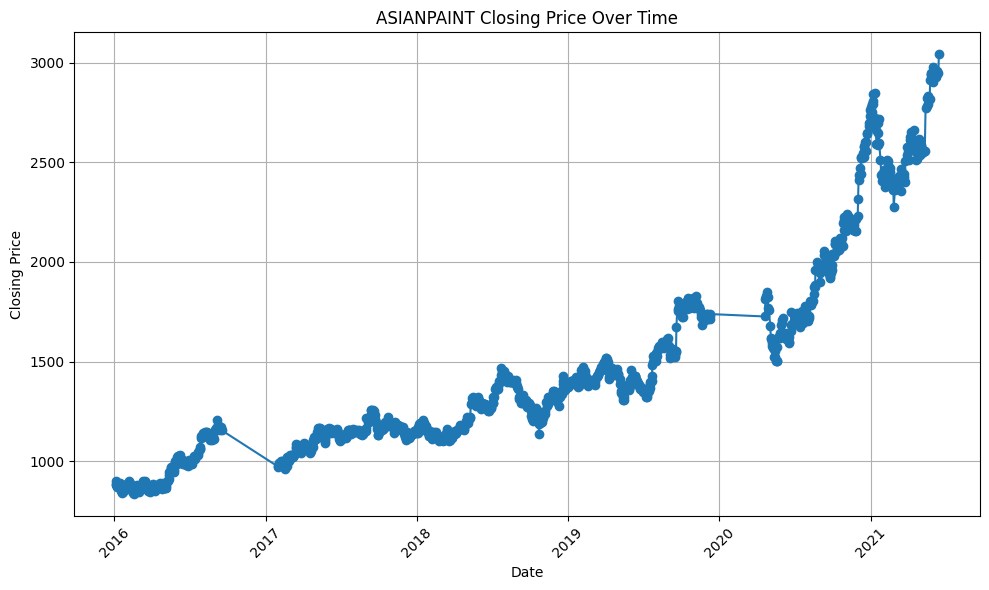

In [6]:
# Plotting the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(asianpaints['DATE'], asianpaints['CLOSE'], marker='o', linestyle='-')
plt.title('ASIANPAINT Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

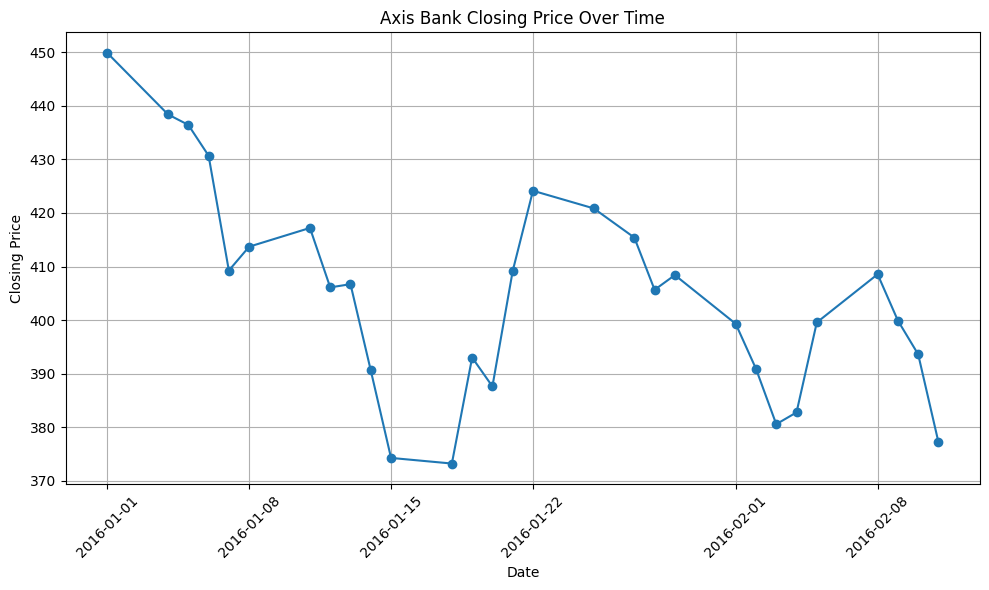

In [7]:
# Plotting the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(axisbank['DATE'], axisbank['CLOSE'], marker='o', linestyle='-')
plt.title('Axis Bank Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(axisbank['DATE'], axisbank['VOLUME'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time for Axis Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
px.nam
fig.title("Axis Bank")
fig=px.scatter(x='DATE',y='VOLUME',data_frame=axisbank)
fig.update_layout(width=800, height=600)
fig.show()

In [4]:
# Assuming the features and target variable for linear regression
# For example, let's use 'Open', 'High', 'Low', and 'Volume' as features, and 'Close' as the target variable
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME']]
y = df['CLOSE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-5.80402063e-01  7.80100455e-01  8.00568644e-01 -1.94205172e-07]
Mean Squared Error: 73.96572214515808
R-squared: 0.9996870562193589


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/8thsem/ADS/nse_sensex.csv', nrows=1200)

df['CLOSE_change'] = df['CLOSE'].diff().shift(-1) > 0
df.dropna(inplace=True)
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME']]
y = df['CLOSE_change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.5
Confusion Matrix:
[[120   0]
 [120   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       120
        True       0.00      0.00      0.00       120

    accuracy                           0.50       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.25      0.50      0.33       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


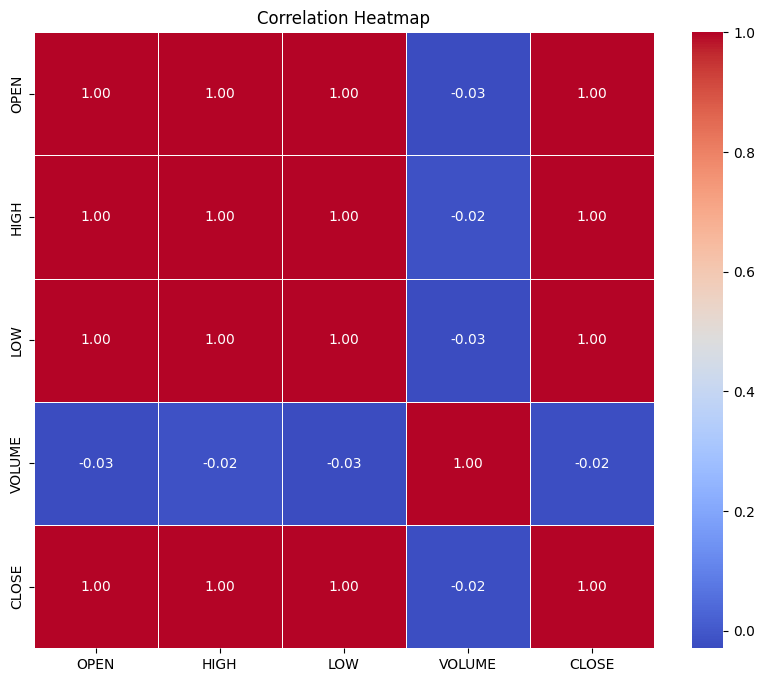

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/8thsem/ADS/nse_sensex.csv', nrows=1200)

features = ['OPEN', 'HIGH', 'LOW', 'VOLUME', 'CLOSE']

corr_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])
jan = df.query('DATE < "2016-02-01" and SYMBOL == "ASIANPAINT" ')[['PREV CLOSE']]
feb = df.query('DATE < "2016-03-01" and DATE> "2016-01-31" and SYMBOL == "ASIANPAINT" ')[['PREV CLOSE']]
march = df.query('DATE < "2016-04-01" and DATE > "2016-02-29" and SYMBOL == "ASIANPAINT" ')[['PREV CLOSE']]
jan

In [ ]:
from scipy.stats import f_oneway
f_oneway(jan, feb, march)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Given data
data = {
    "DATE": ["2016-01-01", "2016-01-04", "2016-01-05", "2016-01-06", "2016-01-07", "2021-06-09", "2021-06-10", "2021-06-11", "2021-06-14", "2021-06-15"],
    "SYMBOL": ["ASIANPAINT", "ASIANPAINT", "ASIANPAINT", "ASIANPAINT", "ASIANPAINT", "ULTRACEMCO", "ULTRACEMCO", "ULTRACEMCO", "ULTRACEMCO", "ULTRACEMCO"],
    "DELIVERABLE VOLUME": [149531, 337383, 533231, 1008881, 477288, 142162, 75717, 71706, 40303, 85738],
    "%DELIVERBLE": [0.5086, 0.4758, 0.3884, 0.5878, 0.4819, 0.4119, 0.3811, 0.3715, 0.2519, 0.4439]
}

# Create DataFrame
df = pd.DataFrame(data)

# Contingency table
contingency_table = pd.crosstab(df['DELIVERABLE VOLUME'], df['%DELIVERBLE'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

In [ ]:
import pandas as pd
import scipy.linalg


df = pd.read_csv('/content/drive/MyDrive/8thsem/ADS/nse_sensex.csv', nrows=1200)
features = ['OPEN', 'HIGH', 'LOW', 'VOLUME', 'CLOSE']
X = df[features].values

import numpy as np

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X)
# Perform LU decomposition
P, L, U = scipy.linalg.lu(X)

# Print the LU decomposition matrices
print("Permutation matrix (P):")
print(P)
print("\nLower triangular matrix (L):")
print(L)
print("\nUpper triangular matrix (U):")
print(U)



Permutation matrix (P):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Lower triangular matrix (L):
[[ 1.          0.          0.          0.          0.        ]
 [ 0.88215488  1.          0.          0.          0.        ]
 [ 0.92592593 -0.38170436  1.          0.          0.        ]
 ...
 [ 0.13501684 -0.04078963  0.02702188  0.23157151 -0.0274342 ]
 [ 0.13397306 -0.07338969  0.07779224  0.38801125  0.09934609]
 [ 0.13228956 -0.04653909  0.12138819  0.26777205  0.02209278]]

Upper triangular matrix (U):
[[ 2.97000000e+03  3.05000000e+03  2.96095000e+03  2.26203100e+06
   3.04220000e+03]
 [ 0.00000000e+00  1.44677609e+02 -1.04664983e+01  8.54824631e+06
   9.08084175e+01]
 [ 0.00000000e+00  0.00000000e+00 -1.55615478e+02  6.11399372e+06
  -1.85539883e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.77595889e+07
  -4.81089120e-01]
 [ 0.00000000e+00  0.00000000e+00  0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('/content/drive/MyDrive/8thsem/ADS/nse_sensex.csv', nrows=1200)
target_column = 'OPEN'

# Split features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Check for missing values in the 'OPEN' column
missing_values = df['OPEN'].isnull().sum()
print("Missing values in 'OPEN' column:", missing_values)

# Check for non-numeric values in the 'OPEN' column
non_numeric_values = pd.to_numeric(df['OPEN'], errors='coerce').isnull().sum()
print("Non-numeric values in 'OPEN' column:", non_numeric_values)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier (Random Forest Classifier)
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Missing values in 'OPEN' column: 0
Non-numeric values in 'OPEN' column: 0


ValueError: could not convert string to float: '2017-09-15'